# Competition:TravelPackagePrediction

##### *  Input Data -tour_package.csv

#Context
 
"Visit with us". company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

#### Problem
- To predict which customer is more likely to purchase the newly introduced travel package
- Which variables are most significant.
- Which segment of customers should be targeted more.

In [78]:
#importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load the dataset into python environment

In [81]:
#reading the data into python environment
data=pd.read_csv('tour_package.csv')
#displaying the data
data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


- There are 4888 rows and 20 columns.

###### -             Data Dictionary


- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer
- Customer interaction data:

- PitchSatisfactionScore: Sales pitch satisfaction score
- ProductPitched: Product pitched by the salesperson
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- DurationOfPitch: Duration of the pitch by a salesperson to the customer

## I. Data Preprocessing

####  Making ‘CustomerID’ as the index column

In [82]:
data.index=data['CustomerID']
data.drop('CustomerID',axis=1,inplace=True)
data.index

Int64Index([200000, 200001, 200002, 200003, 200004, 200005, 200006, 200007,
            200008, 200009,
            ...
            204878, 204879, 204880, 204881, 204882, 204883, 204884, 204885,
            204886, 204887],
           dtype='int64', name='CustomerID', length=4888)

####  Checking the basic details of the dataset

In [83]:
#displaying the information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 200000 to 204887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4662 non-null   float64
 2   TypeofContact             4863 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4637 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4843 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4862 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4748 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  P

In [84]:
data.describe().T # checking the statistical values

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0


In [85]:
#checking the missing values
data.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [86]:
data.nunique()# finding the unique values in the columns

ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

#### Checking the unique values of columns

In [87]:
for i in data.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    print('*'*50)

Unique values in ProdTaken are :
0    3968
1     920
Name: ProdTaken, dtype: int64
**************************************************
Unique values in Age are :
35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
57.0     29
60.0     29
18.0     14
61.0      9
Name: Age, dtype: int64
**************************************************
Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
Unique values in CityTier are :
1    3190
3    1500
2     198
Name

- Majority of the customers has chosen Package.
- In Gender,there are 3 values-Male,Female and Fe male. Female and Fe male should be taken as same.
- 3 star property is prefered by customers
- Most of the customers are from Tier1 cities
- Most of the customers opted Basic in ProductPitched.

### 1. Fill in all the missing values present in all the columns in the dataset

In [88]:
data.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

-8 columns have missing values.

In [89]:
#'Female' and 'Fe male' must be taken as one catagory 'Female' and can be done by replace().

data['Gender']=data['Gender'].replace('Fe Male','Female')
data['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [90]:
#1. replacing the missing values of 'Age' with median
data["Age"] = data["Age"].replace(np.NaN, data["Age"].median())

#2. replacing the missing values of 'NumberOfFollowups' with median
data["NumberOfFollowups"] = data["NumberOfFollowups"].replace(np.NaN, data["NumberOfFollowups"].median())

#3. replacing the missing values of 'DurationOfPitch' with median
data["DurationOfPitch"] = data["DurationOfPitch"].replace(np.NaN, data["DurationOfPitch"].median())

#4. replacing the missing values of 'PreferredPropertyStar' with median
data["PreferredPropertyStar"] = data["PreferredPropertyStar"].replace(np.NaN, data["PreferredPropertyStar"].median())

#5. replacing the missing values of 'NumberOfTrips' with median
data["NumberOfTrips"] = data["NumberOfTrips"].replace(np.NaN, data["NumberOfTrips"].median())

#6. replacing the missing values of 'NumberOfChildrenVisiting' with median
data["NumberOfChildrenVisiting"] = data["NumberOfChildrenVisiting"].replace(np.NaN, data["NumberOfChildrenVisiting"].median())# replacing the missing values of 'NumberOfChildrenVisiting' with median

#7. replacing the missing values of 'MonthlyIncome' with mean
data["MonthlyIncome"] = data["MonthlyIncome"].replace(np.NaN,data["MonthlyIncome"].mean())



In [91]:
#8. replacing the missing values of 'TypeofContact' with mode
print('Mode of TypeofContact is-', data['TypeofContact'].mode())

data["TypeofContact"] = data["TypeofContact"].fillna('Self Enquiry')

Mode of TypeofContact is- 0    Self Enquiry
dtype: object


In [92]:
#checking the null values again after filling them
data.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

- Null values are filled completely.

In [93]:
## Converting the data type of categorical features to 'category'

category_columns = ['Designation','ProdTaken', 'OwnCar', 'Passport',
            'CityTier','MaritalStatus',
            'ProductPitched','Gender','Occupation','TypeofContact']
data[category_columns] = data[category_columns].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 200000 to 204887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4888 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4888 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4888 non-null   float64 
 13  Passport                  4888 non-null  

### 2. Checking and handling outliers 

In [94]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4888.0,37.547259,9.104795,18.0,31.0,36.0,43.00,61.0
DurationOfPitch,4888.0,15.362930,8.316166,5.0,9.0,13.0,19.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.00,5.0
NumberOfFollowups,4888.0,3.711129,0.998271,1.0,3.0,4.0,4.00,6.0
PreferredPropertyStar,4888.0,3.577946,0.797005,3.0,3.0,3.0,4.00,5.0
NumberOfTrips,4888.0,3.229746,1.822769,1.0,2.0,3.0,4.00,22.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.00,5.0
NumberOfChildrenVisiting,4888.0,1.184738,0.852323,0.0,1.0,1.0,2.00,3.0
MonthlyIncome,4888.0,23619.853491,5250.862747,1000.0,20485.0,22655.0,25424.75,98678.0


In [95]:
#Finding the 25th percentile and 75th percentiles.
Q1 = data.quantile(0.25)             
Q3 = data.quantile(0.75)

 #Inter Quantile Range (75th perentile - 25th percentile)
IQR = Q3 - Q1                          

#Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower_limit=Q1-1.5*IQR                        
upper_limit=Q3+1.5*IQR

#Finding the sum of the outliers in each column of int and float types.
((data.select_dtypes(include=['float64','int64'])<lower_limit) | (data.select_dtypes(include=['float64','int64'])>upper_limit)).sum()

Age                           0
DurationOfPitch             112
NumberOfPersonVisiting        3
NumberOfFollowups           312
PreferredPropertyStar         0
NumberOfTrips               109
PitchSatisfactionScore        0
NumberOfChildrenVisiting      0
MonthlyIncome               375
dtype: int64

###### i.checking the outlier in 'MonthlyIncome' column

Text(0.5, 1.0, 'Box plot  of MonthlyIncome  (before handling outliers)')

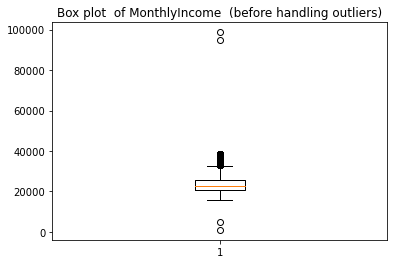

In [96]:
plt.boxplot(data['MonthlyIncome'])
plt.title('Box plot  of MonthlyIncome  (before handling outliers)')

In [97]:
# finding index of outliers 
index_of_outliers=data.loc[data['MonthlyIncome'].gt(upper_limit['MonthlyIncome'])| data['MonthlyIncome'].lt(lower_limit['MonthlyIncome']) ].index
print('index_of_outliers of MonthlyIncome\n')
print(index_of_outliers)


index_of_outliers of MonthlyIncome

Int64Index([200025, 200029, 200038, 200045, 200062, 200105, 200106, 200123,
            200142, 200165,
            ...
            204827, 204830, 204832, 204836, 204850, 204851, 204859, 204868,
            204869, 204870],
           dtype='int64', name='CustomerID', length=375)


Text(0.5, 1.0, 'Box plot  of MonthlyIncome  (after handling outliers)')

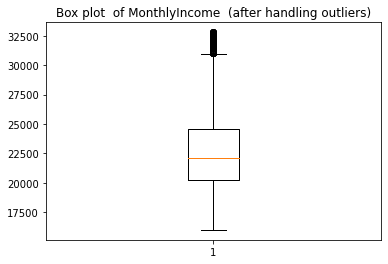

In [98]:
#removing outliers

#Dropping observaions with MonthlyIncome greater than upper limit. There are just 2 such observations
data.drop(index=data.loc[data['MonthlyIncome'].gt(upper_limit['MonthlyIncome'])| data['MonthlyIncome'].lt(lower_limit['MonthlyIncome'])].index,inplace=True)

#displaying the data
plt.boxplot(data['MonthlyIncome'])
plt.title('Box plot  of MonthlyIncome  (after handling outliers)')

* All the outliers are removed from MonthlyIncome.

###### ii. checking 'NumberOfTrips' column

Text(0.5, 1.0, 'Box plot  of NumberOfTrips  (before handling outliers)')

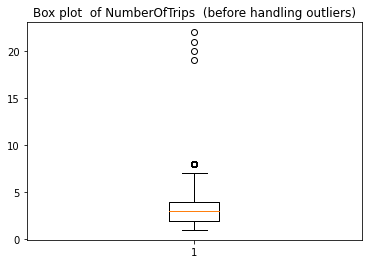

In [99]:
plt.boxplot(data['NumberOfTrips'])
plt.title('Box plot  of NumberOfTrips  (before handling outliers)')

In [100]:
# finding index of outliers 
index_of_outliers=data.loc[data['NumberOfTrips'].gt(upper_limit['NumberOfTrips'])| data['NumberOfTrips'].lt(lower_limit['NumberOfTrips']) ].index
print('index_of_outliers of NumberOfTrips \n')
print(index_of_outliers)


index_of_outliers of NumberOfTrips 

Int64Index([200385, 200816, 202446, 202453, 202558, 202579, 202603, 202605,
            202662, 202665,
            ...
            204651, 204676, 204685, 204735, 204754, 204778, 204840, 204847,
            204857, 204867],
           dtype='int64', name='CustomerID', length=103)


Text(0.5, 1.0, 'Box plot  of NumberOfFollowups  (after handling outliers)')

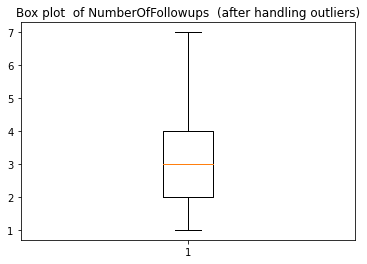

In [101]:
#removing outliers

#Dropping observaions with MonthlyIncome greater than upper limit. There are just 2 such observations
data.drop(index=data.loc[data['NumberOfTrips'].gt(upper_limit['NumberOfTrips'])| data['NumberOfTrips'].lt(lower_limit['NumberOfTrips']) ].index,inplace=True)

#displaying the data
plt.boxplot(data['NumberOfTrips'])
plt.title('Box plot  of NumberOfFollowups  (after handling outliers)')

###### iii. checking 'DurationOfPitch' column

Text(0.5, 1.0, 'Box plot  of DurationOfPitch  (before handling outliers)')

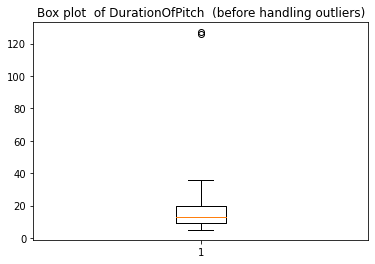

In [102]:
plt.boxplot(data['DurationOfPitch'])# checking 'Pclass' column
plt.title('Box plot  of DurationOfPitch  (before handling outliers)')

In [103]:
# finding index of outliers 
index_of_outliers=data.loc[data['DurationOfPitch'].gt(upper_limit['DurationOfPitch'])| data['DurationOfPitch'].lt(lower_limit['DurationOfPitch']) ].index
print('index_of_outliers of DurationOfPitch\n')
print(index_of_outliers)


index_of_outliers of DurationOfPitch

Int64Index([200061, 200141, 200199, 200204, 200259, 200271, 200352, 200424,
            200425, 200748,
            ...
            204437, 204518, 204662, 204664, 204670, 204706, 204722, 204738,
            204779, 204789],
           dtype='int64', name='CustomerID', length=106)


Text(0.5, 1.0, 'Box plot  of DurationOfPitch  (after handling outliers)')

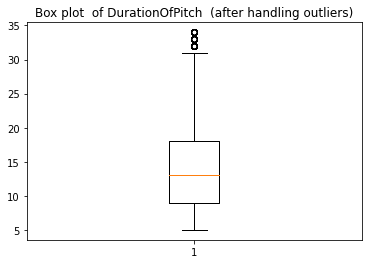

In [104]:
#removing outliers

#Dropping observaions with MonthlyIncome greater than upper limit. There are just 2 such observations
data.drop(index=data.loc[data['DurationOfPitch'].gt(upper_limit['DurationOfPitch'])| data['DurationOfPitch'].lt(lower_limit['DurationOfPitch']) ].index,inplace=True)

#displaying the data
plt.boxplot(data['DurationOfPitch'])
plt.title('Box plot  of DurationOfPitch  (after handling outliers)')

- The values in 'DurationOfPitch' outside the lower and upper limits are removed.

In [105]:
#data['ProdTaken'] = data['ProdTaken'].astype('int64')
#data['ProdTaken']
## Converting the data type of categorical features to 'integer'

integer_columns = ['ProdTaken', 'OwnCar', 'Passport',
            'CityTier']
data[integer_columns] = data[integer_columns].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4304 entries, 200000 to 204887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4304 non-null   int64   
 1   Age                       4304 non-null   float64 
 2   TypeofContact             4304 non-null   category
 3   CityTier                  4304 non-null   int64   
 4   DurationOfPitch           4304 non-null   float64 
 5   Occupation                4304 non-null   category
 6   Gender                    4304 non-null   category
 7   NumberOfPersonVisiting    4304 non-null   int64   
 8   NumberOfFollowups         4304 non-null   float64 
 9   ProductPitched            4304 non-null   category
 10  PreferredPropertyStar     4304 non-null   float64 
 11  MaritalStatus             4304 non-null   category
 12  NumberOfTrips             4304 non-null   float64 
 13  Passport                  4304 non-null  

#### Correlation matrix and pairplot

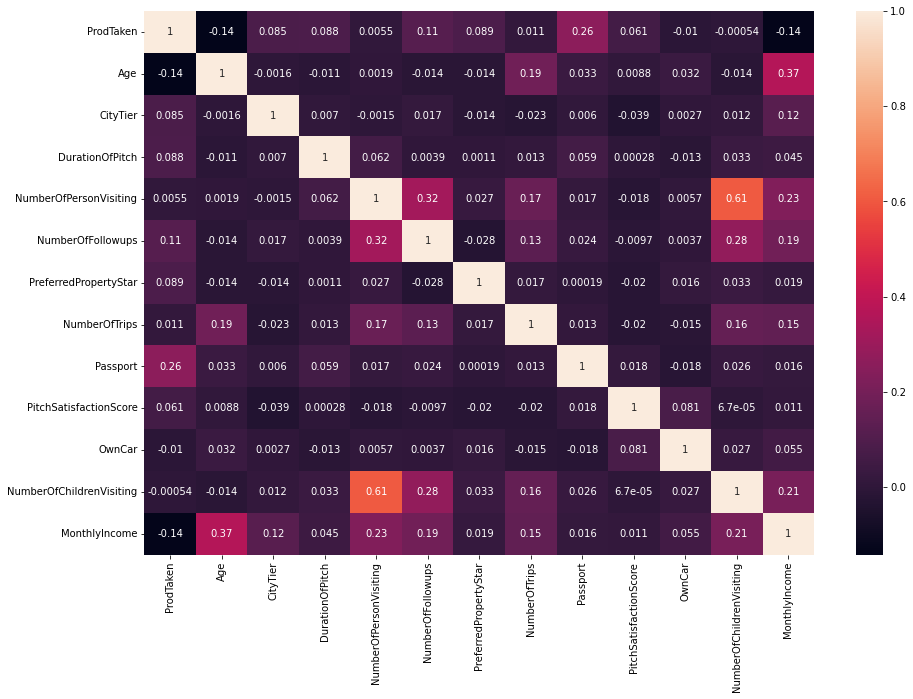

In [106]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

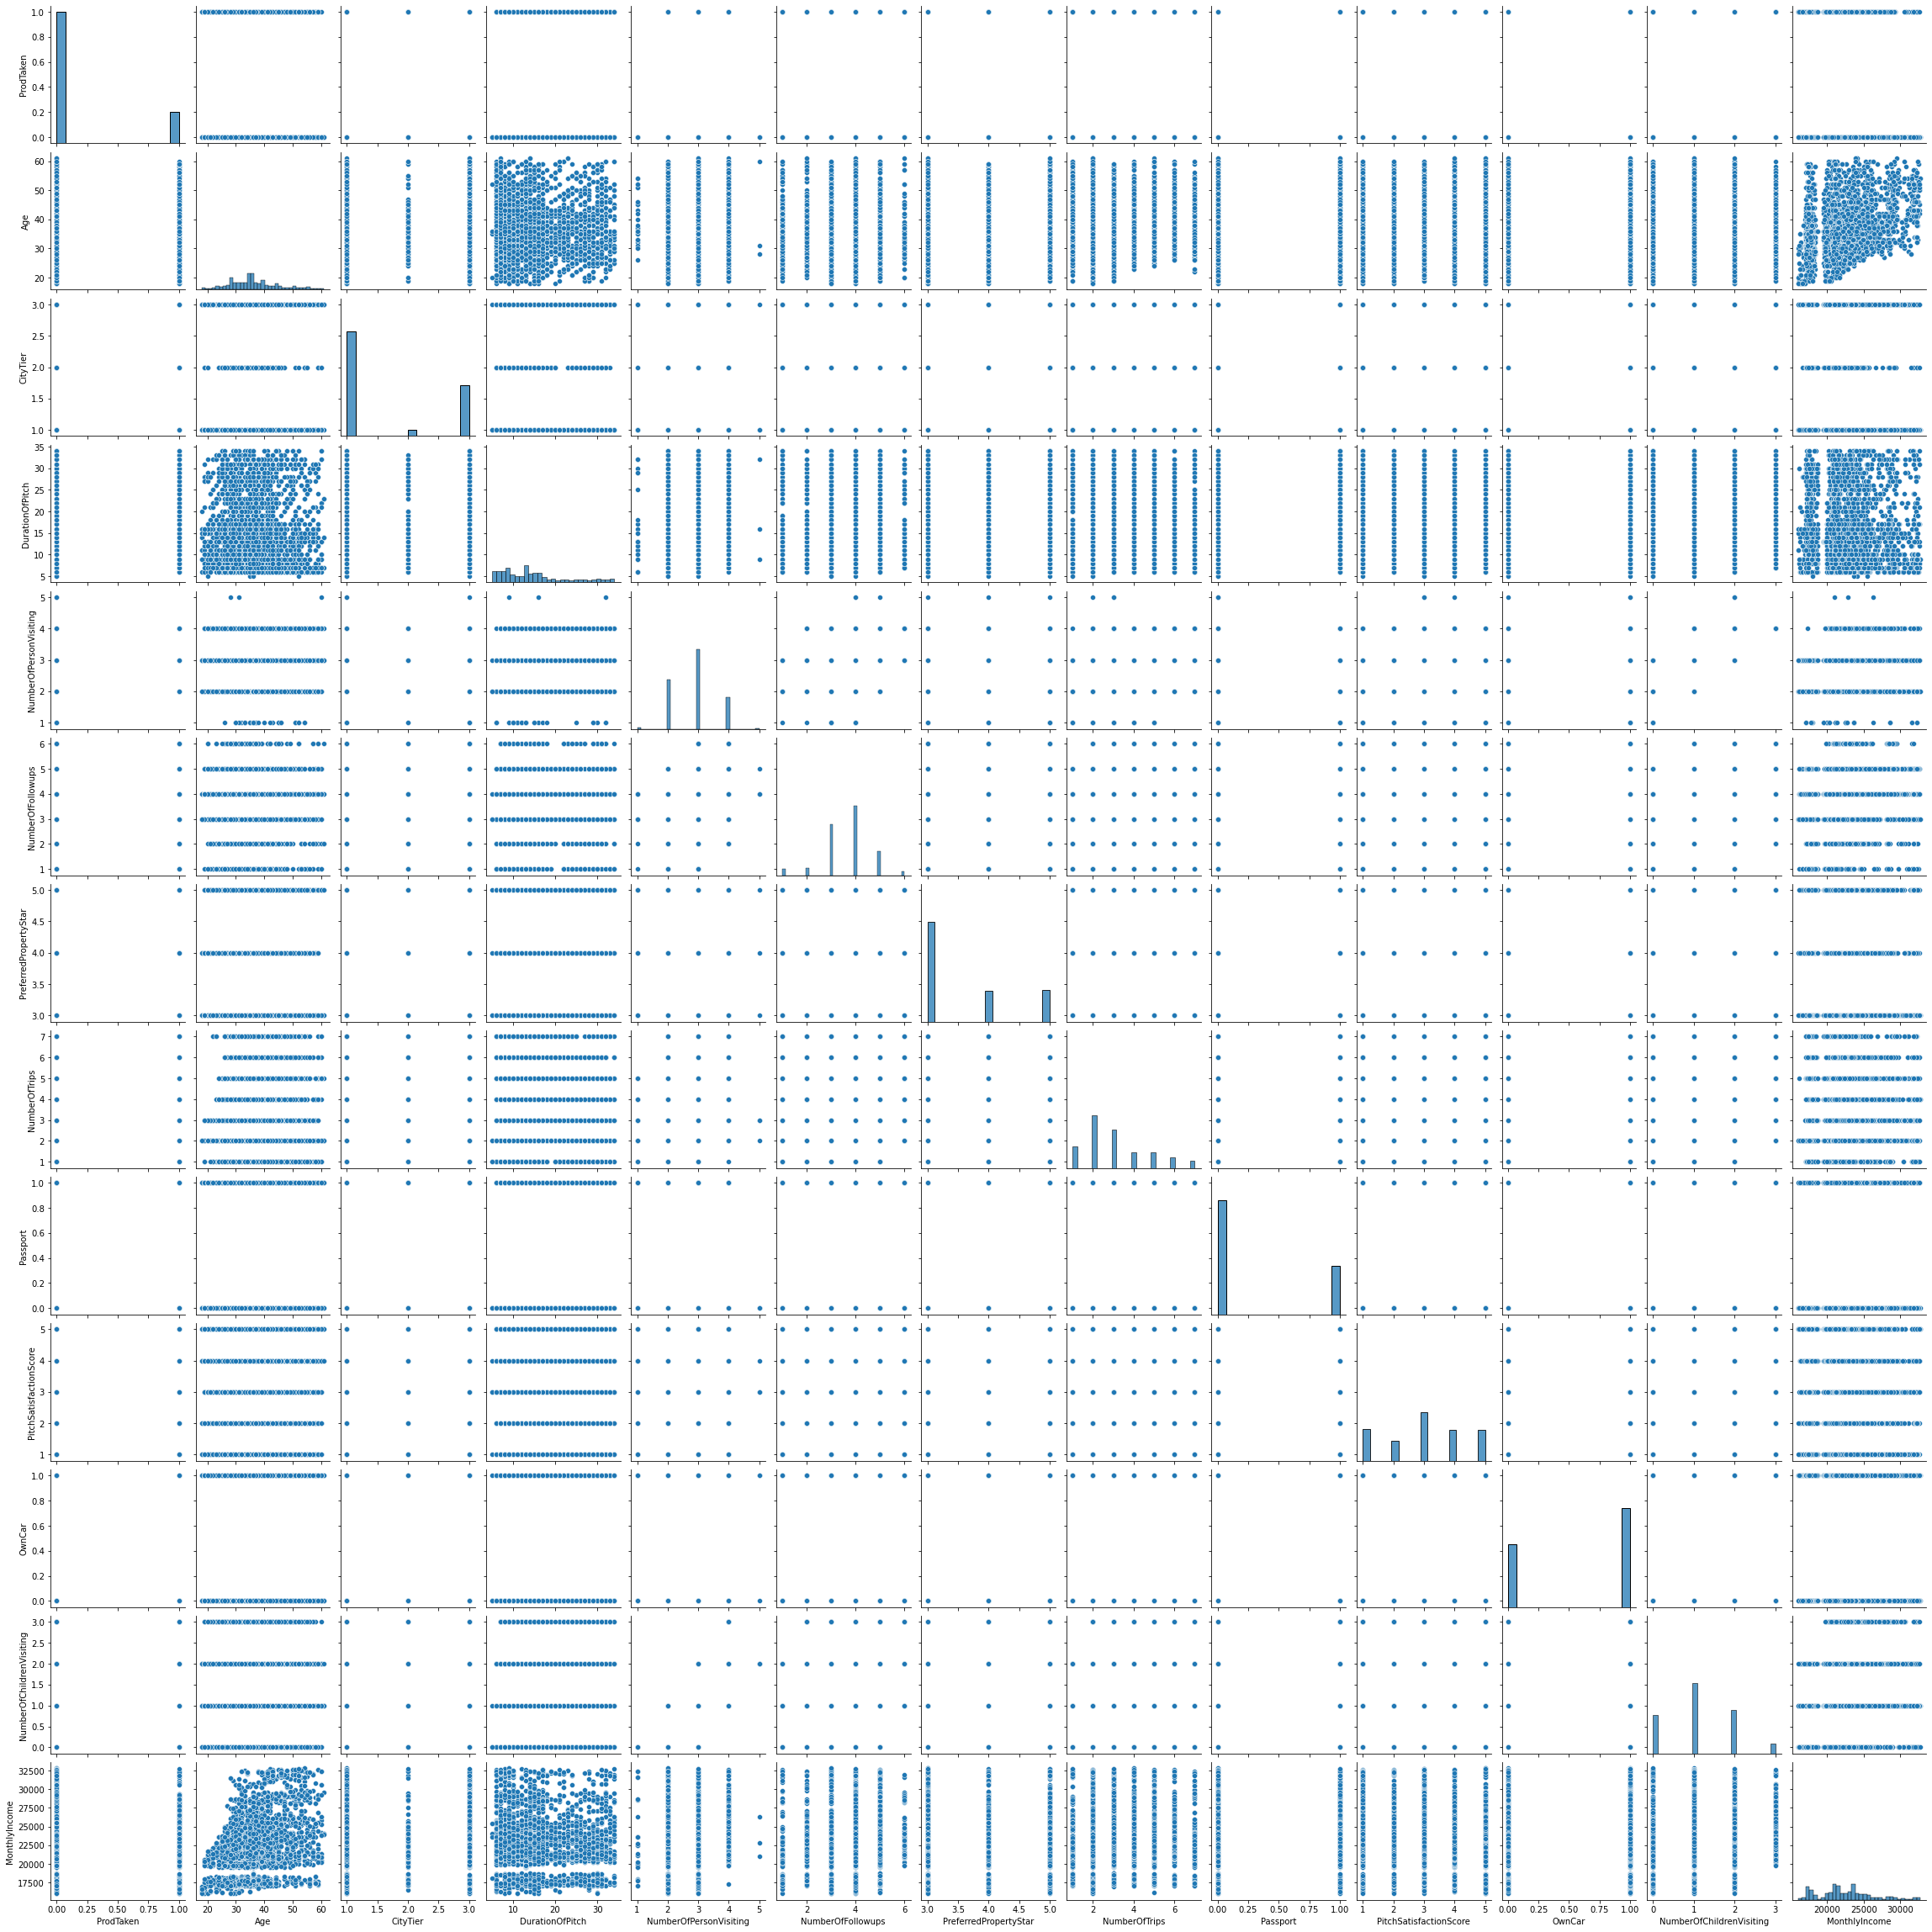

In [107]:
sns.pairplot(data)

- Age,Duration of Pitch,OwnCar,Monthly income,NumberOfPersonVisiting and no.of children visiting have very less correlation with ProdTaken(target).
- Age and Monthly income are high;y positively correlated.
- No.of person visiting and no.of children visiting are highly correlated.

## 3.Feature Reduction

In [114]:
#Dropping Age,Duration of Pitch,OwnCar,Monthly income,NumberOfPersonVisiting and no.of children visiting.

# And separating target column'ProdTaken'
X = data.drop(['ProdTaken','DurationOfPitch','ProductPitched','Age','MonthlyIncome','NumberOfChildrenVisiting'],axis=1)


y = data['ProdTaken']   #target
X.head()

X.shape


(4304, 13)

## 4. Doing Dummy encoding on the feature set.

In [116]:
Data_dummy_encoded=pd.get_dummies(X)
X=pd.DataFrame(Data_dummy_encoded)
X.shape

(4304, 25)

In [117]:
X.corr()

,CityTier,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,TypeofContact_Company Invited,TypeofContact_Self Enquiry,...,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
CityTier,1.000000,-0.001498,0.016627,-0.014403,-0.023222,0.006037,-0.038868,0.002740,0.017290,-0.017290,...,-0.010646,0.016490,-0.040904,-0.037029,0.079624,0.022753,-0.287156,0.236828,0.056090,0.031068
NumberOfPersonVisiting,-0.001498,1.000000,0.320482,0.026529,0.167131,0.017018,-0.018234,0.005720,0.005778,-0.005778,...,-0.007928,0.023506,0.027403,-0.163468,0.114162,-0.078542,0.036827,-0.013005,0.012458,0.018603
NumberOfFollowups,0.016627,0.320482,1.000000,-0.028370,0.125906,0.023611,-0.009703,0.003738,0.017236,-0.017236,...,0.000552,-0.023330,-0.041660,-0.042568,0.130658,-0.075648,0.001455,-0.002799,0.043206,0.039322
PreferredPropertyStar,-0.014403,0.026529,-0.028370,1.000000,0.016825,0.000191,-0.019596,0.015823,-0.040987,0.040987,...,-0.028925,-0.002769,0.032209,-0.027409,-0.012189,-0.005578,0.000547,-0.028394,0.039079,0.011361
NumberOfTrips,-0.023222,0.167131,0.125906,0.016825,1.000000,0.013059,-0.019836,-0.015462,-0.009790,0.009790,...,-0.007362,0.004993,0.048672,-0.083159,0.017042,0.027094,-0.064592,0.033796,0.025535,0.005499
Passport,0.006037,0.017018,0.023611,0.000191,0.013059,1.000000,0.017942,-0.017739,-0.005952,0.005952,...,-0.043082,-0.001184,0.009674,0.004328,-0.016990,0.018263,0.023417,-0.023245,-0.013138,0.033233
PitchSatisfactionScore,-0.038868,-0.018234,-0.009703,-0.019596,-0.019836,0.017942,1.000000,0.080515,0.024122,-0.024122,...,0.010751,0.037769,-0.034371,0.015469,-0.010346,0.047869,0.015375,-0.029904,-0.010695,0.030692
OwnCar,0.002740,0.005720,0.003738,0.015823,-0.015462,-0.017739,0.080515,1.000000,0.004084,-0.004084,...,-0.022737,0.040498,-0.012822,-0.030400,0.006513,0.043151,-0.045277,-0.003710,0.039084,0.017177
TypeofContact_Company Invited,0.017290,0.005778,0.017236,-0.040987,-0.009790,-0.005952,0.024122,0.004084,1.000000,-1.000000,...,0.001204,-0.025170,0.006424,0.010217,0.007595,0.009682,-0.035363,0.035592,-0.004468,-0.013927
TypeofContact_Self Enquiry,-0.017290,-0.005778,-0.017236,0.040987,0.009790,0.005952,-0.024122,-0.004084,-1.000000,1.000000,...,-0.001204,0.025170,-0.006424,-0.010217,-0.007595,-0.009682,0.035363,-0.035592,0.004468,0.013927


## II. EXPLORATORY DATA ANALYSIS

#### 1.Univariate Analysis

###### Histogram

Text(0.5, 1.0, 'Histogram of CityTier')

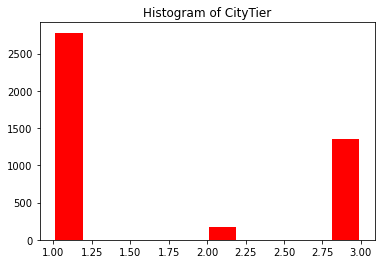

In [118]:
plt.hist(data['CityTier'],color='red',rwidth=0.9)
plt.title('Histogram of CityTier')

- The people from City Tier 1 are the majority in purchase of Package.

Text(0.5, 1.0, 'Histogram of MonthlyIncome')

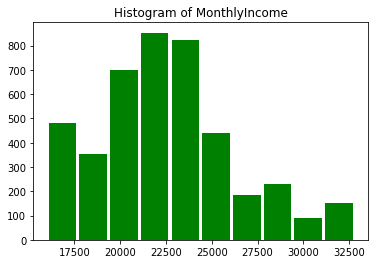

In [119]:
plt.hist(data['MonthlyIncome'],color='green',rwidth=0.9)
plt.title('Histogram of MonthlyIncome')

- Majority of people is having income between 20000 and 25000.

##### Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x13777a370a0>,
 'caps': [<matplotlib.lines.Line2D at 0x13777a377c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13777a2acd0>],
 'medians': [<matplotlib.lines.Line2D at 0x13777a37ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13777a422b0>],
 'means': []}

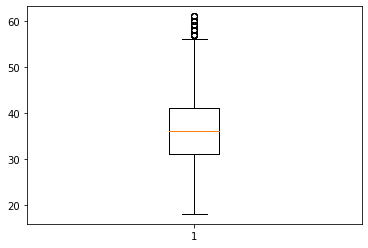

In [120]:
plt.boxplot(data['Age'])

- No outliers

### 2.Bivariate Analysis

**_Bargraph_**

<function matplotlib.pyplot.show(close=None, block=None)>

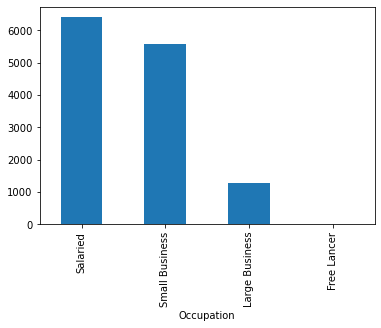

In [121]:
#data.plot.scatter(x = 'Occupation', y = 'NumberOfTrips',)
data.groupby('Occupation')['NumberOfTrips'].sum().nlargest(5).plot.bar()
plt.show

- The salaried ones took the greatest number of trips whereas the free lancer ones took the least.

##### Countplot

<AxesSubplot:xlabel='Gender', ylabel='count'>

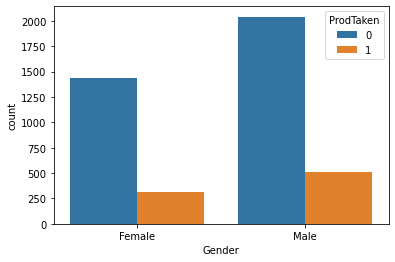

In [128]:
sns.countplot(x=data['Gender'],hue=data['ProdTaken'])

- Males has purchased the package more.

##### Pairplot

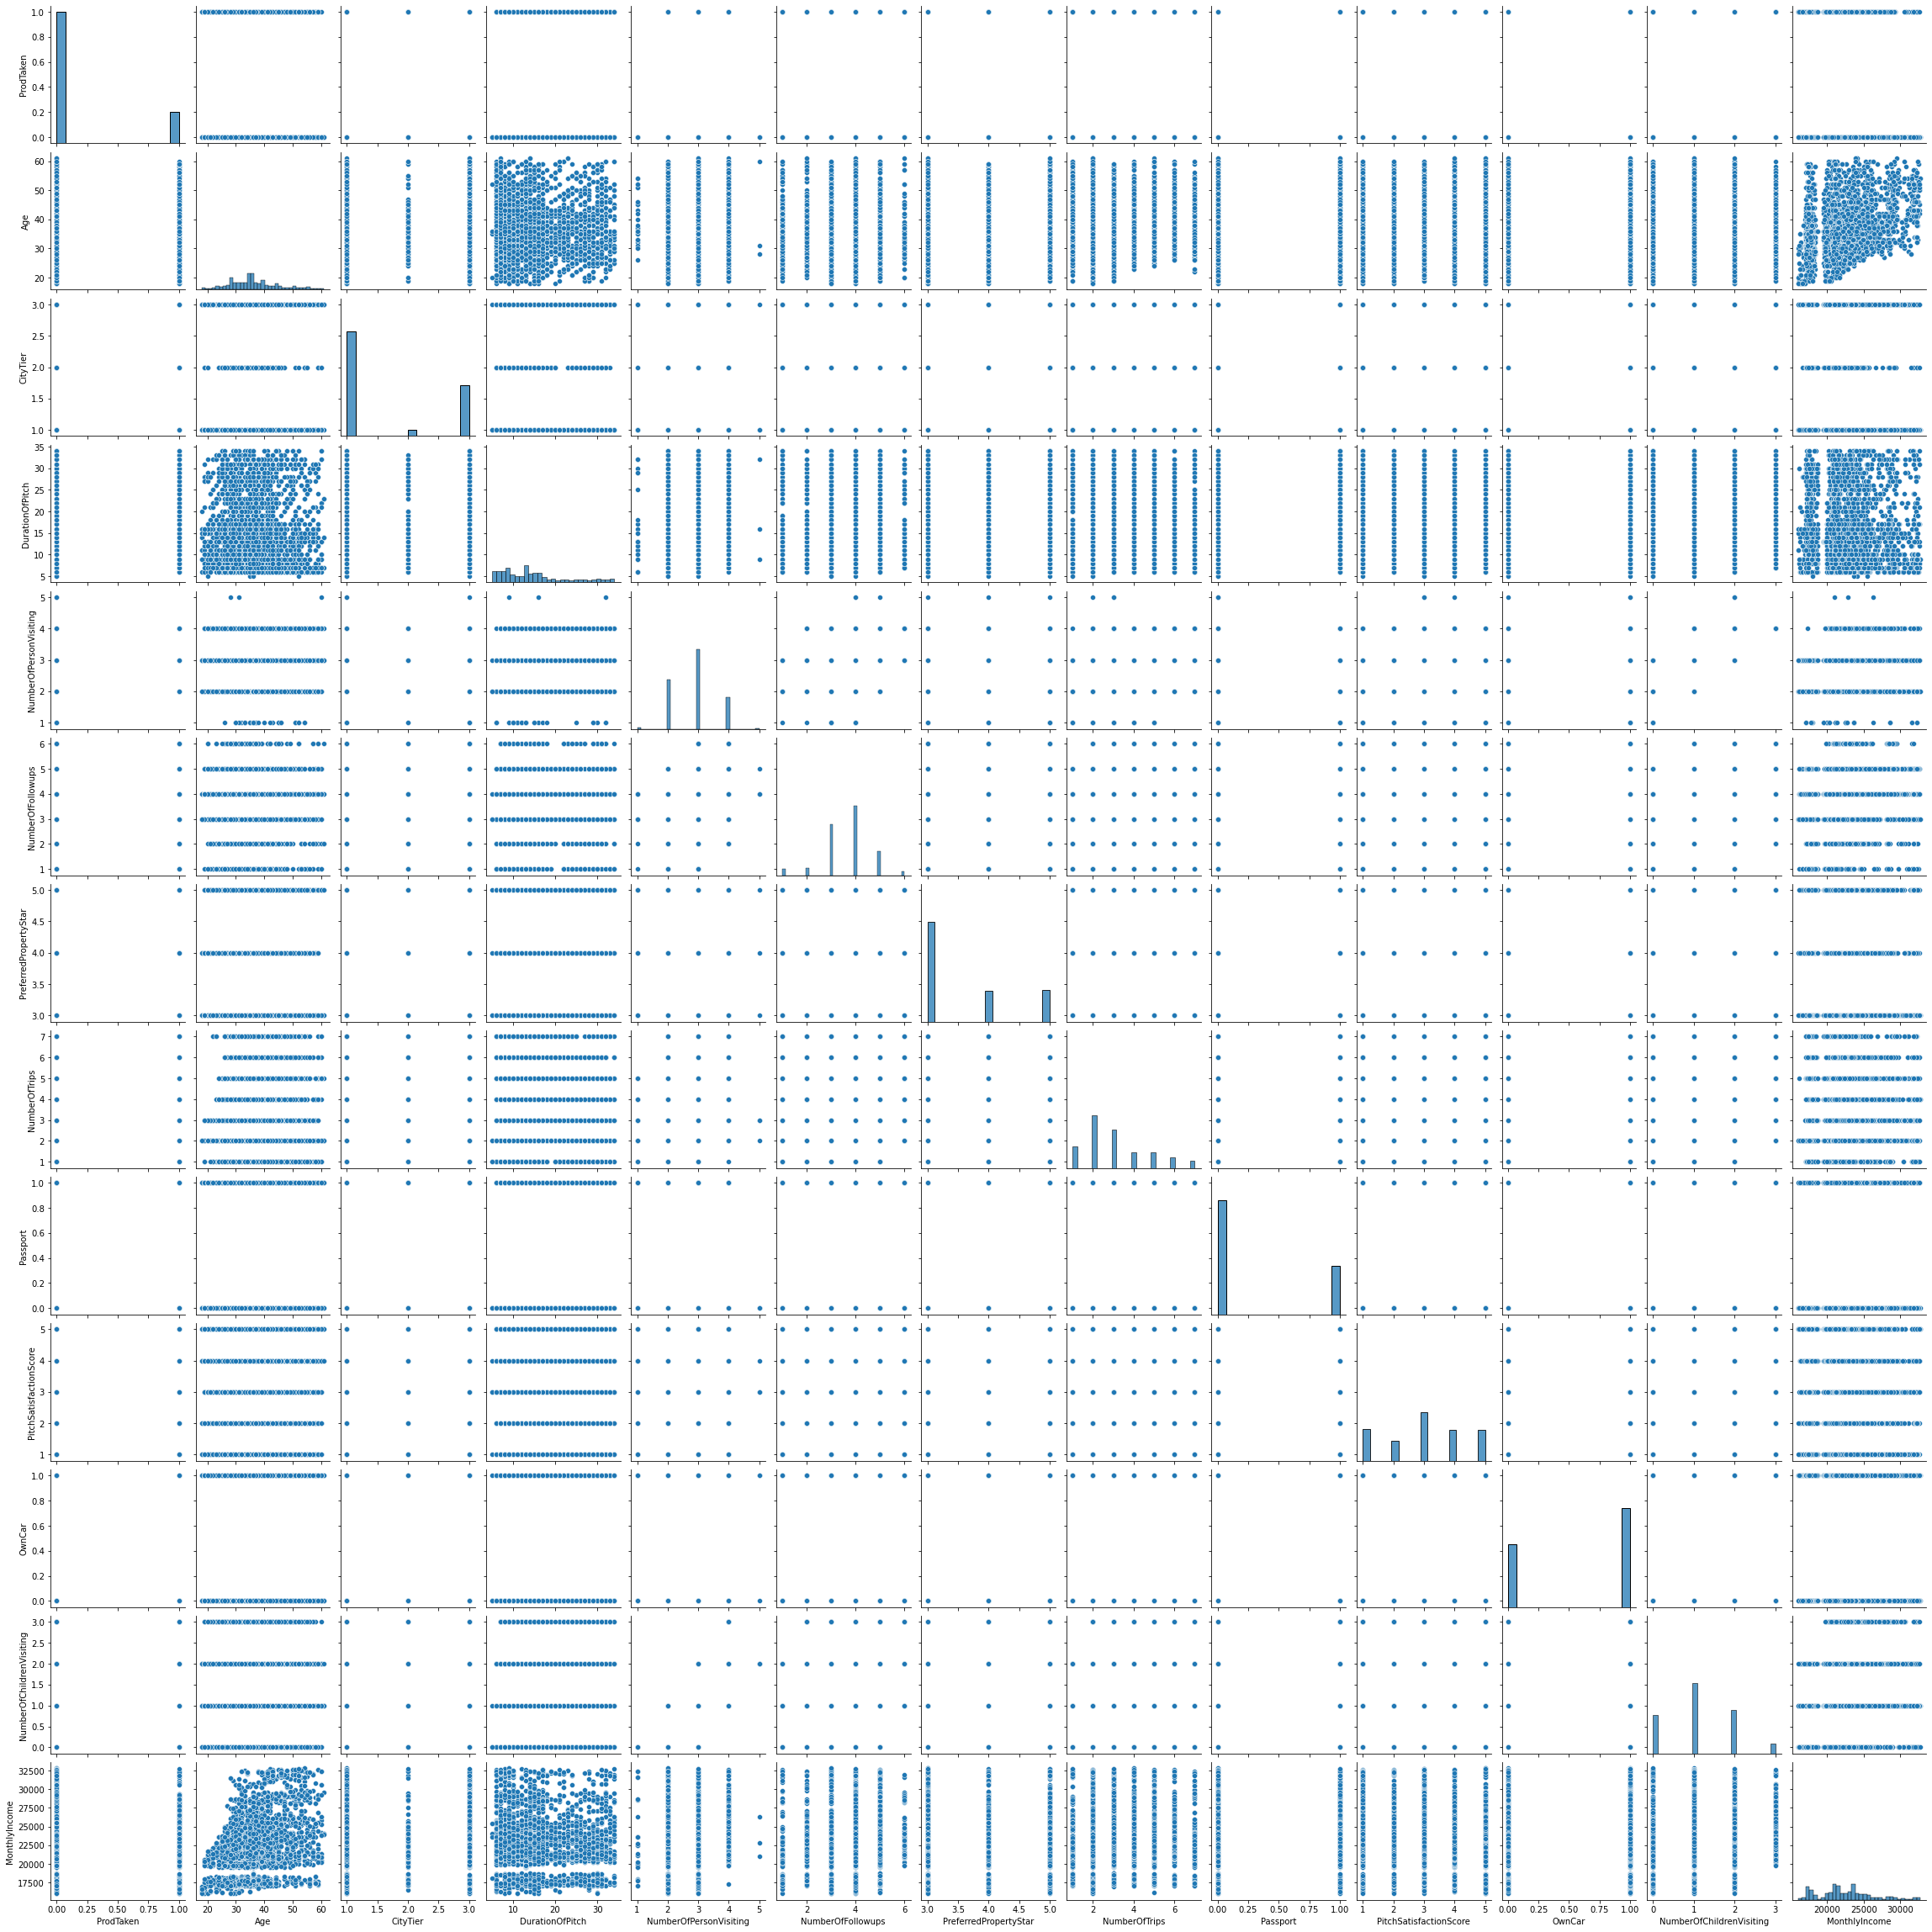

In [123]:
sns.pairplot(data)

## IV. MODEL

In [129]:
#Already splitted the data into inputs and output 

# X is the input set
#y is the target


In [130]:
X.shape

(4304, 25)

In [131]:
y.shape

(4304,)

### 1.Logistic Regression

In [132]:
#importing train_test_split from the scikit-learn library
from sklearn.model_selection import train_test_split

# we have to split the data into training and testing parts 
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

#importing  Logistic regression from the scikit-learn library 
from sklearn.linear_model import LogisticRegression


# create instance of the model and storing it to variable logit_model
logit_model = LogisticRegression()

# fit this into xtrain and y train to create the model
logit_model.fit(X_train,y_train)

# next predict the values in the x test using this model created
# and storing those values to variable y_pred
y_pred = logit_model.predict(X_test)


#importing mean_squared_error from sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [133]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [134]:
print('The Performance of Logistic regression is:\n')
print('Accuracy is:',accuracy_score(y_test,y_pred)) # we have to compare y test with y predictions
print('Precesion is:',precision_score(y_test,y_pred))
print('Recall is:', recall_score(y_test,y_pred))
print('f1_score is:',f1_score(y_test,y_pred))

The Performance of Logistic regression is:

Accuracy is: 0.8257839721254355
Precesion is: 0.6075949367088608
Recall is: 0.2874251497005988
f1_score is: 0.3902439024390244


In [135]:
confusion_matrix(y_test,y_pred)

array([[663,  31],
       [119,  48]], dtype=int64)

### 2. KNN

In [136]:
#importing KNN classifier  from the scikit-learn library
from sklearn.neighbors import KNeighborsClassifier # KNN classifier 

KNN_model = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
KNN_model.fit(X_train, y_train)
y_pred = KNN_model.predict(X_test)


In [137]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [138]:
print('The Performance of KNN is:\n')
print('Accuracy is:',accuracy_score(y_test,y_pred)) # we have to compare y test with y predictions
print('Precesion is:',precision_score(y_test,y_pred))
print('Recall is:', recall_score(y_test,y_pred))
print('f1_score is:',f1_score(y_test,y_pred))

The Performance of KNN is:

Accuracy is: 0.8803716608594657
Precesion is: 0.7580645161290323
Recall is: 0.562874251497006
f1_score is: 0.6460481099656357


In [139]:
confusion_matrix(y_test,y_pred)

array([[664,  30],
       [ 73,  94]], dtype=int64)

### 3.Decision Tree

In [140]:
from sklearn.tree import DecisionTreeClassifier # importing DecisionTreeClassifier algorithm

DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
y_pred = DT_model.predict(X_test)


In [141]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [142]:
print('The Performance of Decision Tree is:\n')
print('Accuracy is:',accuracy_score(y_test,y_pred)) # we have to compare y test with y predictions
print('Precesion is:',precision_score(y_test,y_pred))
print('Recall is:', recall_score(y_test,y_pred))
print('f1_score is:',f1_score(y_test,y_pred))

The Performance of Decision Tree is:

Accuracy is: 0.9036004645760743
Precesion is: 0.75
Recall is: 0.7544910179640718
f1_score is: 0.7522388059701492


In [143]:
confusion_matrix(y_test,y_pred)

array([[652,  42],
       [ 41, 126]], dtype=int64)

### 4.SVM

#### Linear classifier

In [144]:

from sklearn.svm import SVC

svm_linear =SVC(kernel ='linear')
svm_linear.fit(X_train,y_train)

y_pred = svm_linear.predict(X_test)


In [145]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [146]:
print('The Performance of Linear svm is:\n')
print('Accuracy is:',accuracy_score(y_test,y_pred)) # we have to compare y test with y predictions
print('Precesion is:',precision_score(y_test,y_pred))
print('Recall is:', recall_score(y_test,y_pred))
print('f1_score is:',f1_score(y_test,y_pred))

The Performance of Linear svm is:

Accuracy is: 0.8211382113821138
Precesion is: 0.76
Recall is: 0.11377245508982035
f1_score is: 0.19791666666666666


In [147]:
confusion_matrix(y_test,y_pred)

array([[688,   6],
       [148,  19]], dtype=int64)

#### Polynomial SVM

In [148]:
svm_poly = SVC(kernel='poly',degree=3)
svm_poly.fit(X_train,y_train)
svm_poly.get_params()

y_pred = svm_poly.predict(X_test)


In [149]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [150]:
print('The Performance of Polynomial SVM is:\n')
print('Accuracy is:',accuracy_score(y_test,y_pred)) # we have to compare y test with y predictions
print('Precesion is:',precision_score(y_test,y_pred))
print('Recall is:', recall_score(y_test,y_pred))
print('f1_score is:',f1_score(y_test,y_pred))

The Performance of Polynomial SVM is:

Accuracy is: 0.8327526132404182
Precesion is: 0.7346938775510204
Recall is: 0.2155688622754491
f1_score is: 0.3333333333333333


In [151]:
confusion_matrix(y_test,y_pred)

array([[681,  13],
       [131,  36]], dtype=int64)

#### RBF SVM

In [152]:
svm_radial = SVC(kernel='rbf')

# rbf = radial basis function, it is sometimes called gaussian kernel

svm_radial.fit(X_train,y_train)
svm_radial.get_params()


y_pred = svm_radial.predict(X_test)


In [153]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [154]:
print('The Performance of RBF SVM is:\n')
print('Accuracy is:',accuracy_score(y_test,y_pred)) # we have to compare y test with y predictions
print('Precesion is:',precision_score(y_test,y_pred))
print('Recall is:', recall_score(y_test,y_pred))
print('f1_score is:',f1_score(y_test,y_pred))

The Performance of RBF SVM is:

Accuracy is: 0.8199767711962834
Precesion is: 0.875
Recall is: 0.08383233532934131
f1_score is: 0.15300546448087432


In [155]:
confusion_matrix(y_test,y_pred)

array([[692,   2],
       [153,  14]], dtype=int64)

### 5. Random Forest

In [156]:
#Import Random Forest Model from sklearn
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


In [157]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

In [158]:
print('The Performance of Random Forest is:\n')
print('Accuracy is:',accuracy_score(y_test,y_pred)) # we have to compare y test with y predictions
print('Precision is:',precision_score(y_test,y_pred))
print('Recall is:', recall_score(y_test,y_pred))
print('f1_score is:',f1_score(y_test,y_pred))


The Performance of Random Forest is:

Accuracy is: 0.89198606271777
Precision is: 0.8303571428571429
Recall is: 0.5568862275449101
f1_score is: 0.6666666666666666


In [159]:
confusion_matrix(y_test,y_pred)

array([[675,  19],
       [ 74,  93]], dtype=int64)

##### Random Forest is having high accuracy.

Accuracy is: 0.9070847851335656
Precision is: 0.8536585365853658
Recall is: 0.6287425149700598
f1_score is: 0.7241379310344828

## 5. MODE FINE TUNING of RANDOM FOREST MODEL

#### sklearn.ensemble.RandomForestClassifier

In [160]:
#Displaying the parameters of sklearn.ensemble.RandomForestClassifier
print(clf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


## RandomizedSearchCV

- Usually, we only have a vague idea of the best hyperparameters and thus the best approach to narrow our search is to evaluate a wide range of values for each hyperparameter. 
- Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.

In [161]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 125, 150, 175, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


##### Random Search Training

In [162]:
#Now, we instantiate the random search and fit it like any Scikit-Learn model:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 125, 150, 175,
                                                         200]},
                   random_state=42, verbose=2)

In [163]:
rf_random.best_score_# displaying the score of the tuned model

0.9073452737890189

In [164]:
# We can view the best parameters from fitting the random search:
rf_random.best_params_# displaying the best set of parameter values

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': False}

#### Grid Search with Cross Validation

- We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define.
- To use Grid Search, we make another grid based on the best values provided by random search:

In [165]:
#We can fit the model, display the best hyperparameters, and evaluate performance:
rfc=RandomForestClassifier(n_estimators=150,min_samples_split=2, min_samples_leaf= 1,max_features='sqrt', max_depth= 90, bootstrap= False)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

In [166]:
print('The Performance of Random Forest after hyper parameter tuning is:\n')
print('Accuracy is:',accuracy_score(y_test,y_pred)) # we have to compare y test with y predictions
print('Precision is:',precision_score(y_test,y_pred))
print('Recall is:', recall_score(y_test,y_pred))
print('f1_score is:',f1_score(y_test,y_pred))


The Performance of Random Forest after hyper parameter tuning is:

Accuracy is: 0.9175377468060395
Precision is: 0.8582089552238806
Recall is: 0.688622754491018
f1_score is: 0.7641196013289037


##### Hence, we can find the performance of Random Forest Algorithm is improved after Hyper parameter tuning (RandomSearchCV and GridSearchCV).